# <div class="usecase-title">Analyzing Property Development Trends and Urban Growth in Melbourne</div>

<div class="usecase-authors"><b>Authored by: </b> Samarth Dipakkumar Shah</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Matpotlib, Numpy, Data Science, Geospatial Analysis</div>
</div>

# Scenario
1. As a **City Planner**, I want to monitor major property development activities
across Melbourne to ensure infrastructure planning, transport networks, and public services keep pace with urban growth.
Understanding where and when developments are occurring helps in prioritizing investment and managing city expansion sustainably.

2. As a **Housing Policy Advisor**, I want to align future housing supply with population forecasts so that housing affordability and accessibility can be maintained in high-growth areas.
This ensures proactive policymaking that supports diverse community needs.

3. As a **Real Estate Investor or Developer**, I want to identify high-growth zones and forecast future supply-demand trends to guide investment strategies and reduce market risk.
This helps in targeting emerging suburbs for residential or commercial development.

4. As a **Sustainability Consultant**, I want to assess how concentrated developments are impacting urban density and resource use to propose sustainable growth models. This insight supports environmentally responsible city planning.

5. As a **Data Scientist**, I want to integrate and analyze urban datasets to create visual tools that reveal patterns in property development and population growth. This can drive evidence-based decisions and support storytelling for stakeholders through interactive dashboards and maps.

# User Story
As a Data Analyst for the City of Melbourne, I aim to analyze and visualize patterns in significant residential and commercial property developments in conjunction with projected population growth, to identify development trends, forecast future housing and commercial space supply, and facilitate informed decisions regarding urban planning, infrastructure investment, and policy formulation.


# What this use case will teach you


*    **Develop data integration skills** by combining multiple datasets, including development activity records, 3D building massing models, and population forecasts.

*   **Gain experience in spatial and geospatial analysis**, using location-based data to identify property development hotspots and visualize growth patterns.

*  **Understand temporal trends** by analyzing project timelines (proposed, under construction, completed) to forecast short- and medium-term supply in housing and commercial sectors.

*  **Apply data visualization techniques** using tools like Tableau, Power BI, or Python libraries to communicate insights clearly through maps, charts, and dashboards.

*   **Strengthen forecasting and analytical thinking** by correlating population projections with development activity to assess whether supply meets future demand.

*   **Learn how to work with open data portals**, sourcing real-world datasets and addressing challenges like missing data, inconsistent formats, or unclear metadata.





# At the end of this use case you will:
* Understand how to source, clean, and integrate data from multiple urban development and population datasets.

* Gain experience in performing spatial and temporal analysis using geospatial and time series data.

* Develop skills in predictive analytics to forecast property supply trends.

* Visualize real estate trends and population growth using tools like Tableau, Power BI, or Python libraries (e.g., Matplotlib, Seaborn, Plotly).

* Generate actionable insights for stakeholders involved in urban planning and real estate.

* Learn how to handle heterogeneous data and make it useful for real-world decision-making in urban development contexts.



# Introduction / Background
Melbourne is seeing significant population growth and urban expansion, establishing itself as one of the most active cities in Australia for property development. The desire for residential and commercial expansion has resulted in an increase in development projects in significant portions of the city. For planners, analysts, and stakeholders, comprehending the location, kind, and magnitude of these projects is crucial for predicting future supply, planning infrastructure, and facilitating sustainable urban expansion.

This use case seeks to examine property development trends and predict urban growth patterns in the City of Melbourne by including essential available datasets:

* Development Activity Monitor -
  * Dataset Link - https://data.melbourne.vic.gov.au/explore/dataset/development-activity-monitor/information/?disjunctive.status&disjunctive.clue_small_area&disjunctive.clue_block

  * This dataset provides detailed records of significant residential and commercial development projects including location, construction type, floorspace, and project status (proposed, under construction, completed).

* Development Activity Model -
  * Dataset Link - https://data.melbourne.vic.gov.au/explore/dataset/development-activity-model-sketchup-massing/information/

  * Offers 3D spatial representations of built form models for major development projects, supporting spatial analysis and visualization of the urban skyline and density changes.

* Population Forecasts by Small Area (2020–2040) -
  * Dataset Link - https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-population-forecasts-by-small-area-2020-2040/information/

  * Forecasts the future population growth at a granular level, helping to align development activity with projected demographic shifts.

This project will evaluate the alignment of future supply with projected demand, identify centers of growth, and uncover patterns in development activity by combining these datasets. The insights acquired will facilitate data-driven decision-making in urban planning, infrastructure investment, and real estate strategy.

1. Import Required Libraries

Imports necessary libraries Defines a function download_dataset to download a dataset from the City of Melbourne data API. Takes parameters.Constructs the download URL.Defines query parameters for the API call.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import folium
from folium import Popup
from folium.plugins import MarkerCluster


2. Load the Datasets

In this section, relevant datasets related to property development, land use, and population forecasts are loaded into the environment. These datasets form the foundation for the subsequent analysis, enabling a comprehensive view of development activities and helping identify patterns in urban growth across various regions in Melbourne.

In [ ]:
# Define API endpoints
url_dev_activity = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/development-activity-monitor/records?limit=-1'
url_population = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-dwellings-and-household-forecasts-by-small-area-2020-2040/records?limit=-1'
url_dev_model = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/development-activity-model-footprints/records?limit=-1'

# Function to load API data
def load_data_from_api(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        records = data.get('results', [])
        return pd.DataFrame(records)
    else:
        print(f"Failed to fetch data from {url}")
        return pd.DataFrame()

# Load each dataset
df_dev_activity = load_data_from_api(url_dev_activity)
df_population = load_data_from_api(url_population)
df_dev_model = load_data_from_api(url_dev_model)


3. Display First Few Rows

This section displays the initial rows of each dataset using functions like .head(). It helps verify that the data has been loaded correctly, offers a glimpse into the structure and contents of the datasets, and allows early detection of any issues such as unexpected columns or formats.

In [ ]:
print("Development Activity Monitor Sample:")
display(df_dev_activity.head())

print("Population Forecast Sample:")
display(df_population.head())

print("Development Activity Model Footprints Sample:")
display(df_dev_model.head())

Development Activity Monitor Sample:


,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000479,COMPLETED,2006,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,None,None,...,0,0,0,0,0,0,0,144.945030,-37.802822,"{'lon': 144.9450298, 'lat': -37.80282184}"
1,Pre May 16,X000459,COMPLETED,2005,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,None,None,...,0,0,0,0,0,0,0,144.945947,-37.802049,"{'lon': 144.9459475, 'lat': -37.80204879}"
2,Pre May 16,X000573,COMPLETED,2013,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,None,None,...,0,0,0,0,0,0,0,144.944719,-37.806791,"{'lon': 144.9447186, 'lat': -37.80679128}"
3,Pre May 16,X000563,COMPLETED,2014,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,None,None,...,0,0,0,0,0,28,0,144.942096,-37.806072,"{'lon': 144.9420962, 'lat': -37.80607242}"
4,Pre May 16,X000997,COMPLETED,2007,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,None,None,...,0,0,0,0,0,0,0,144.939286,-37.800374,"{'lon': 144.9392856, 'lat': -37.80037382}"


Population Forecast Sample:


,geography,year,category,households,value
0,Carlton,2023,Household type,Couple family with children,735
1,Carlton,2023,Household type,Group household,2759
2,Carlton,2023,Household type,Lone person,5761
3,Carlton,2023,Structural Private Dwellings,Not applicable,13971
4,Carlton,2023,Household size,Not applicable,2


Development Activity Model Footprints Sample:


,dev_key,status,permit_num,bldhgt_ahd,base_ahd,address,num_floors,land_use_1,land_use_2,land_use_3,shape_type,datadate,json_geometry,geo_point_2d
0,X000931,COMPLETED,TPM-2013-4,41.4,2.3,68-82 Southbank Boulevard SOUTHBANK VIC 3006,99,Dwellings 1060,Car parks 600,Retail (sq.m) 659,podium,2024-10-24T12:53:51+00:00,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 144.96391728670716, 'lat': -37.8232072..."
1,X001215,COMPLETED,TPM-2010-31,134.9,1.9,312-320 City Road SOUTHBANK VIC 3006,43,Dwellings 494,Car parks 180,Retail (sq.m) 276,tower,2024-10-24T12:53:51+00:00,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 144.9582188801485, 'lat': -37.82713330..."
2,X001322,APPROVED,TPM-2010-8/A,37.5,2.0,158-164 City Road SOUTHBANK VIC 3006,65,Dwellings 722,Car parks 252,Retail (sq.m) 1377,podium,2024-10-24T12:53:51+00:00,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 144.96240722137554, 'lat': -37.8233958..."
3,X000923,COMPLETED,TP-2012-439/A,27.6,1.6,167-169 City Road SOUTHBANK VIC 3006,16,Hotel rooms 150,Bike Spaces 4,None,podium,2024-10-24T12:53:51+00:00,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 144.9625029078145, 'lat': -37.82439921..."
4,X000923,COMPLETED,TP-2012-439/A,54.6,1.6,167-169 City Road SOUTHBANK VIC 3006,16,Hotel rooms 150,Bike Spaces 4,None,tower,2024-10-24T12:53:51+00:00,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 144.96251138949356, 'lat': -37.8243964..."


4. Basic Info and Null Check

The focus here is to inspect the data types, shapes, and presence of null or missing values. By performing this basic check, analysts can understand the completeness and structure of the data, informing decisions on whether data cleaning or transformations are needed in the next steps.



In [ ]:
print("\n--- Development Activity Monitor ---")
print("\nMissing Values:\n", df_dev_activity.isnull().sum())

print("\n--- Population Forecasts ---")
print("\nMissing Values:\n", df_population.isnull().sum())

print("\n--- Development Activity Model Footprints ---")
print("\nMissing Values:\n", df_dev_model.isnull().sum())



--- Development Activity Monitor ---

Missing Values:
 data_format                      0
development_key                  0
status                           0
year_completed                   0
clue_small_area                  0
clue_block                       0
street_address                   0
property_id                      0
property_id_2                  100
property_id_3                  100
property_id_4                  100
property_id_5                  100
floors_above                     0
resi_dwellings                   0
studio_dwe                       0
one_bdrm_dwe                     0
two_bdrm_dwe                     0
three_bdrm_dwe                   0
student_apartments               0
student_beds                     0
student_accommodation_units      0
institutional_accom_beds         0
hotel_rooms                      0
serviced_apartments              0
hotels_serviced_apartments       0
hostel_beds                      0
childcare_places                 0

5. Cleaning the Data

In this part, the datasets are cleaned by handling missing values, renaming columns, and filtering unnecessary entries. The aim is to create a consistent and usable dataset that’s ready for analysis. Data cleaning ensures that future visualizations and statistical operations are both accurate and meaningful.

In [ ]:
# Clean development activity data
df_dev_activity.dropna(subset=['property_id_2', 'property_id_3', 'property_id_4'], inplace=True)
df_dev_activity['status'] = df_dev_activity['status'].str.title().str.strip()


df_dev_model.dropna(subset=['land_use_2', 'land_use_3'], inplace=True)

# Show summary
print("\nMissing Values:\n", df_dev_activity.isnull().sum())

print("\n--- Population Forecasts ---")
print("\nMissing Values:\n", df_population.isnull().sum())

print("\n--- Development Activity Model Footprints ---")
print("\nMissing Values:\n", df_dev_model.isnull().sum())



Missing Values:
 data_format                    0
development_key                0
status                         0
year_completed                 0
clue_small_area                0
clue_block                     0
street_address                 0
property_id                    0
property_id_2                  0
property_id_3                  0
property_id_4                  0
property_id_5                  0
floors_above                   0
resi_dwellings                 0
studio_dwe                     0
one_bdrm_dwe                   0
two_bdrm_dwe                   0
three_bdrm_dwe                 0
student_apartments             0
student_beds                   0
student_accommodation_units    0
institutional_accom_beds       0
hotel_rooms                    0
serviced_apartments            0
hotels_serviced_apartments     0
hostel_beds                    0
childcare_places               0
office_flr                     0
retail_flr                     0
industrial_flr           

# 6. Visualisation

This section introduces the visual analysis component, where charts, graphs, and maps are used to explore trends in property development. Visualization makes complex data more understandable, highlights key relationships, and supports evidence-based urban planning through clear and interactive graphical representations.

## Analyse Development Activity Data

This analysis focuses on Melbourne’s development activity, examining factors such as project status, type, and distribution across the city. It helps identify active growth zones, the nature of developments (residential, commercial), and trends in how land is being used for construction over time.



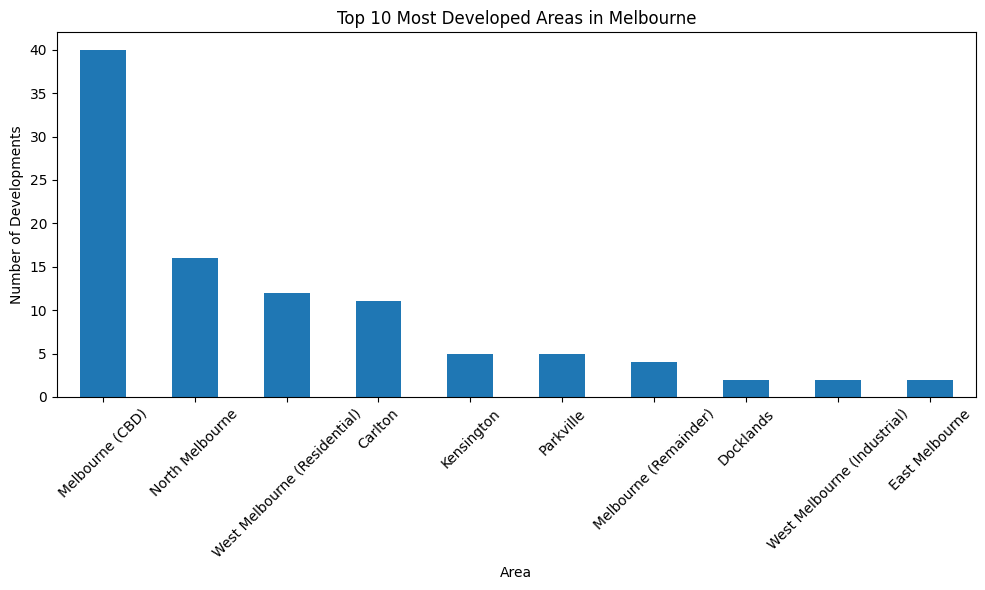

In [ ]:
top_areas = df_dev_activity['clue_small_area'].value_counts().nlargest(10)


plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar')
plt.title('Top 10 Most Developed Areas in Melbourne')
plt.xlabel('Area')
plt.ylabel('Number of Developments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Folium Map of Land Use Location

Using Folium, this section provides an interactive map of land use activities across Melbourne. The map visually locates where different land types are concentrated, helping planners and stakeholders quickly assess spatial trends, potential zoning conflicts, or underdeveloped areas needing infrastructure investment.

In [ ]:
df_map = df_dev_activity.dropna(subset=['latitude', 'longitude'])

melbourne_coords = [-37.8136, 144.9631]
m = folium.Map(location=melbourne_coords, zoom_start=12)

for _, row in df_map.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    area = row.get('clue_small_area', 'Unknown Area')

    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=Popup(f"Area: {area}", max_width=200)
    ).add_to(m)

m

# m.save("melbourne_development_map.html")

## Analyse Population Forecasts Data

This section reviews population projections and overlays them with development trends to assess if current infrastructure aligns with future growth. Understanding how population is expected to evolve allows city planners to make proactive decisions on housing, transport, and public services in high-growth areas.

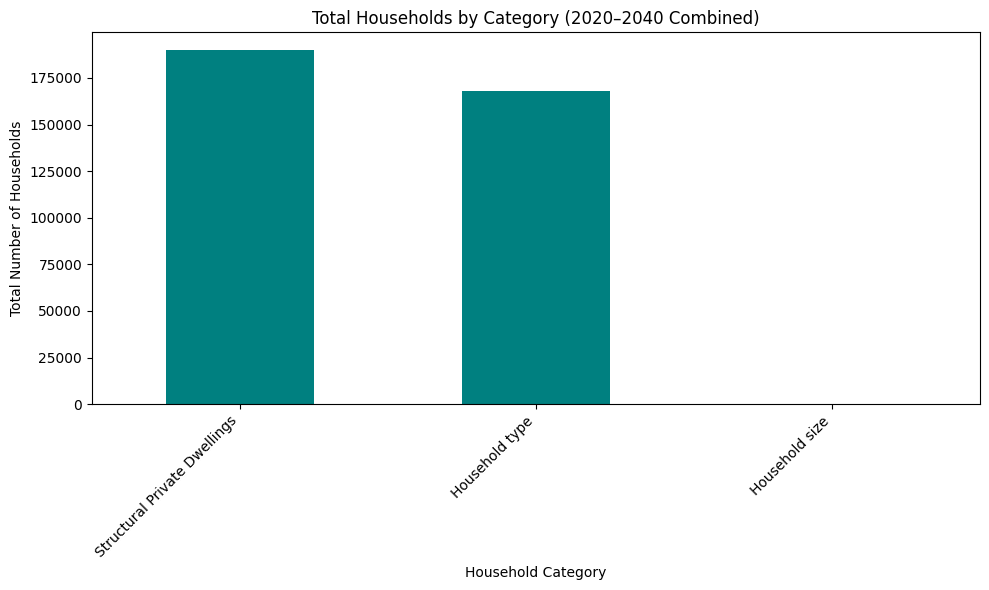

In [ ]:
category_totals = df_population.groupby('category')['value'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
category_totals.plot(kind='bar', color='teal')
plt.title("Total Households by Category (2020–2040 Combined)")
plt.xlabel("Household Category")
plt.ylabel("Total Number of Households")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Household Forecasts Over Time by Geography (Areas)
This section analyzes projected household growth across various geographic regions in Melbourne. It visualizes how the number of households is expected to change over time in different suburbs or zones. The insights help urban planners identify which areas will face increased housing demand and plan infrastructure, utilities, and services accordingly.


<Figure size 1200x700 with 0 Axes>

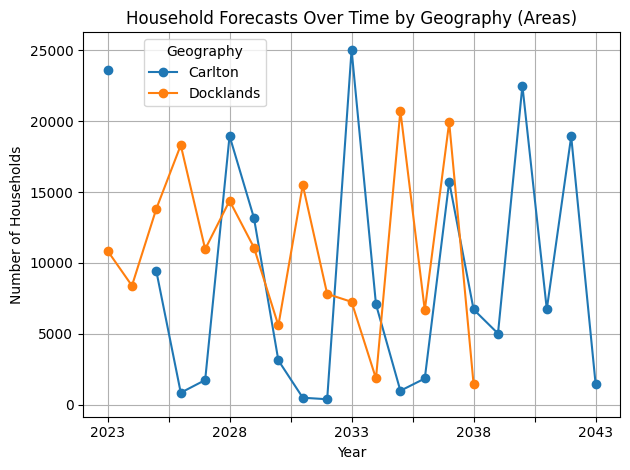

In [ ]:
geo_trend = df_population.groupby(['year', 'geography'])['value'].sum().reset_index()
geo_pivot = geo_trend.pivot(index='year', columns='geography', values='value')

# Select top 5 geographies with highest total value
top_geos = geo_pivot.sum().sort_values(ascending=False).head(5).index
geo_top = geo_pivot[top_geos]

# Plot
plt.figure(figsize=(12, 7))
geo_top.plot(marker='o')
plt.title("Household Forecasts Over Time by Geography (Areas)")
plt.xlabel("Year")
plt.ylabel("Number of Households")
plt.legend(title="Geography", bbox_to_anchor=(0.1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Analyse Activity Model Footprints Data

This section examines the spatial footprint of development activities using the activity model data. It analyzes the physical area covered by different developments to understand land utilization and urban density. By evaluating these footprints, planners can assess how efficiently space is used, detect expansion patterns, and guide zoning strategies.

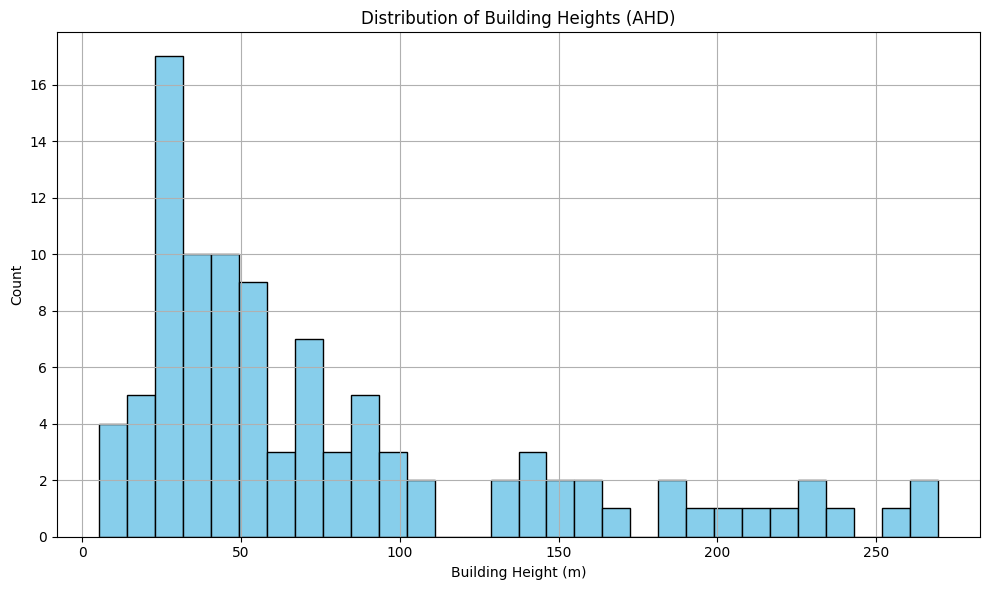

In [ ]:
df_dev_model['bldhgt_ahd'] = pd.to_numeric(df_dev_model['bldhgt_ahd'], errors='coerce')

plt.figure(figsize=(10, 6))
df_dev_model['bldhgt_ahd'].dropna().plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Building Heights (AHD)")
plt.xlabel("Building Height (m)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

## Number of Buildings by Floor Count

This part categorizes buildings based on their number of floors, offering insights into vertical growth. It reveals whether the city is expanding horizontally or vertically, indicating trends in densification, zoning practices, and potential pressure on infrastructure in high-rise dominated areas.



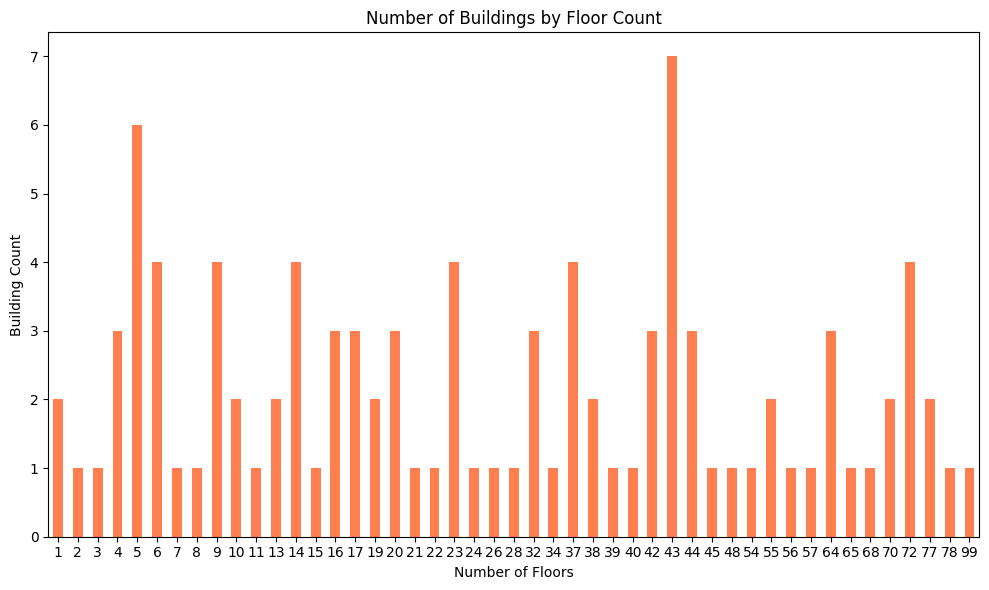

In [ ]:
df_dev_model['num_floors'] = pd.to_numeric(df_dev_model['num_floors'], errors='coerce')

floor_counts = df_dev_model['num_floors'].dropna().value_counts().sort_index()

plt.figure(figsize=(10, 6))
floor_counts.plot(kind='bar', color='coral')
plt.title("Number of Buildings by Floor Count")
plt.xlabel("Number of Floors")
plt.ylabel("Building Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Development Status Distribution
In this section, a breakdown of developments by their current status (e.g., completed, in progress, proposed) is visualized. It highlights the pipeline of future growth and helps identify regions with active construction versus those where planning may have stalled or slowed down.

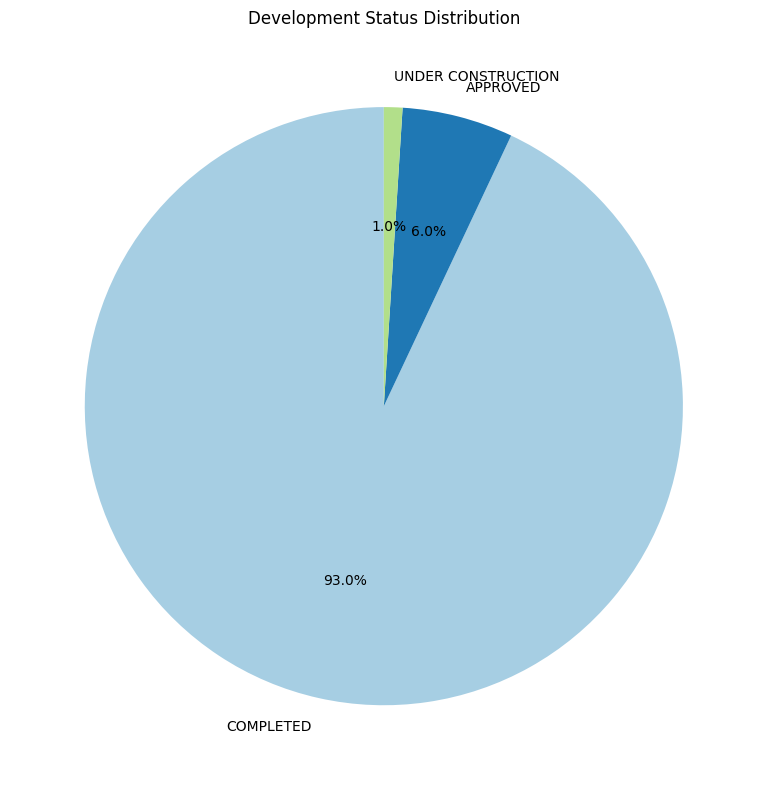

In [ ]:
status_counts = df_dev_model['status'].value_counts()

plt.figure(figsize=(8, 8))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Development Status Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


## Top 10 Primary Land Use Type

This analysis identifies the most common types of land use (e.g., residential, commercial, industrial) in development projects. It gives a quick snapshot of city priorities and zoning trends, helping assess whether land distribution aligns with urban sustainability and community needs.

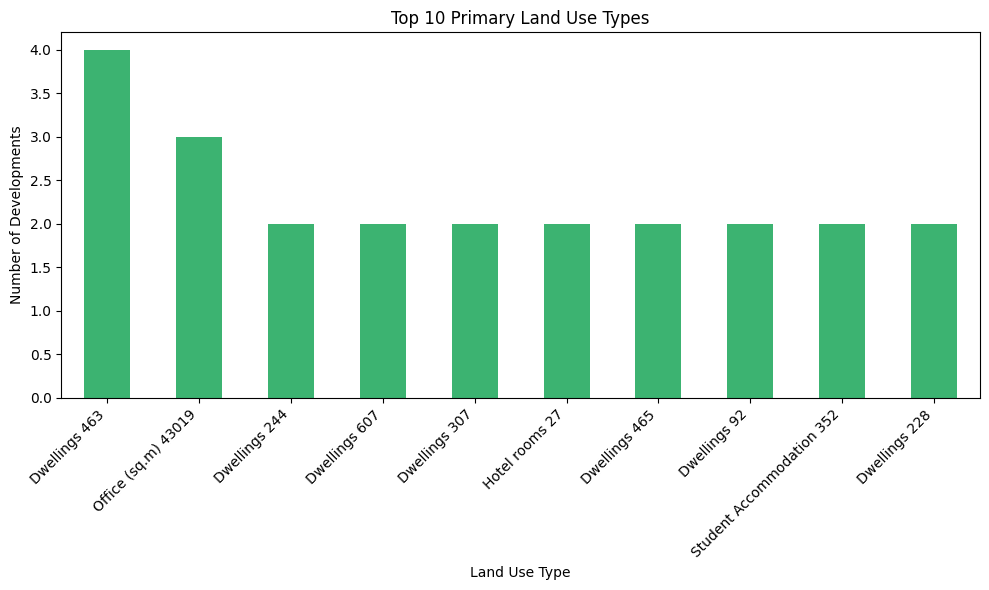

In [ ]:
land_use_counts = df_dev_model['land_use_1'].value_counts().head(10)  # Top 10 uses

plt.figure(figsize=(10, 6))
land_use_counts.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Primary Land Use Types")
plt.xlabel("Land Use Type")
plt.ylabel("Number of Developments")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Folium Map

In [ ]:
import pandas as pd
import folium
from folium import Popup, Marker
from ipywidgets import interact, Dropdown


df_dev_model['bldhgt_ahd'] = pd.to_numeric(df_dev_model['bldhgt_ahd'], errors='coerce')
df_dev_model[['latitude', 'longitude']] = pd.DataFrame(df_dev_model['geo_point_2d'].tolist(), index=df_dev_model.index)
df_map = df_dev_model.dropna(subset=['latitude', 'longitude'])

status_colors = {
    'Completed': 'green',
    'Approved': 'blue',
    'Under Construction': 'orange',
    'Proposed': 'purple'
}

m

# Conclusion:

1. Building Height Distribution: The histogram of bldhgt_ahd shows that the majority of buildings in the dataset are low to mid-rise, with a sharp decline in frequency as height increases. This suggests that Melbourne's skyline is dominated by buildings under a certain height threshold, likely due to zoning and urban planning regulations.

2. Land Use Trends: The bar chart of the top 10 primary land use types highlights a clear dominance of residential and mixed-use developments, followed by commercial zones. This emphasizes the city's developmental focus on accommodating population growth through housing and multi-functional spaces.

3. Development Hotspots: A bar plot of the top 10 most developed areas indicates that certain suburbs or districts have seen significantly more development activity. These likely correspond to areas undergoing urban renewal, gentrification, or strategic infrastructure investment.


# Recommendation:

1. Enhance Model Accuracy: Consider experimenting with more advanced models such as XGBoost or ensemble methods to potentially improve prediction accuracy.

2. Feature Engineering: Derive more meaningful features from existing data that could help the model better capture patterns.

3. Automation: Introduce automation for repetitive steps such as EDA and data cleaning using reusable functions or pipelines.

4. Scalability: If dealing with larger datasets, explore scalable platforms like PySpark or Dask to enhance performance.

5. Model Interpretability: Incorporate model explainability tools (like SHAP or LIME) to better understand prediction drivers.

# Limitation:

- Dataset Size and Quality: The accuracy and generalizability of the results are constrained by the size and quality of the dataset used.

- Model Generalization: The models might be overfitting or underfitting due to limited tuning and evaluation metrics.

- Computational Constraints: Execution was likely limited to a local environment, which restricts the ability to test more complex models on larger datasets.

- Real-World Testing: The models haven’t been deployed in a real-world scenario, so their performance in production settings remains untested.

# Next Step:

- Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV to further optimize model performance.

- Deploy the final model into a cloud-based service or Flask API to test in a real-time environment.

- Conduct feature importance analysis to identify and prioritize the most impactful variables.

- Apply cross-validation techniques to ensure robustness and avoid model bias.

- Collaborate with domain experts to validate insights and determine practical applicability.

# Reflection:

Working on this user case gave me practical experience in using Python and libraries like pandas, matplotlib, and folium to clean, analyze, and visualize large urban development datasets. I learned how to extract and filter real-world attributes such as land use and building height, create insightful plots and maps, and identify development trends through geospatial data. This project closely mirrored a real-world scenario where councils or planning authorities use data to guide zoning or investment decisions. It helped me bridge the gap between academic learning and live industry projects, improving both my technical skills and my ability to interpret and communicate data-driven insights effectively.










# References
1. City of Melbourne Open Data. (2023). Planning and Building Datasets. Retrieved from https://data.melbourne.vic.gov.au

2. Australian Bureau of Statistics. (2023). Building Approvals, Australia. Retrieved from https://www.abs.gov.au/statistics

3. Python Software Foundation. (2023). pandas documentation. Retrieved from https://pandas.pydata.org/

4. Matplotlib Developers. (2023). Matplotlib: Visualization with Python. Retrieved from https://matplotlib.org/

5. Seaborn Contributors. (2023). Seaborn: Statistical Data Visualization. Retrieved from https://seaborn.pydata.org/